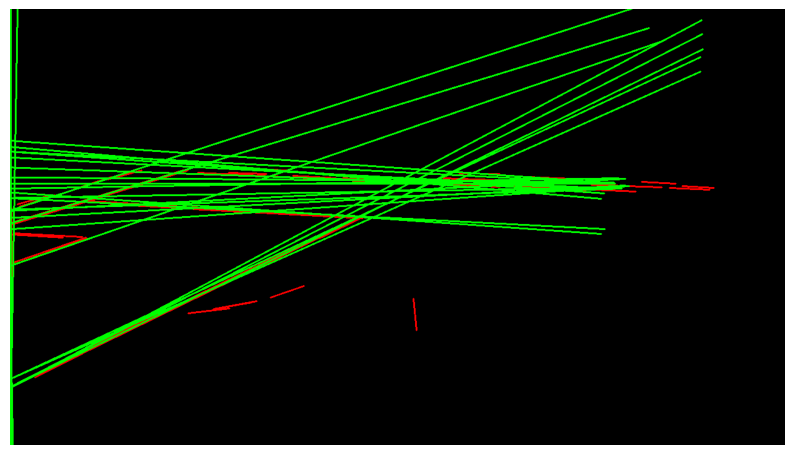

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = './assets/lines_of_field.png'
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Detect lines using Hough Line Transform
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

# Function to merge parallel lines
def merge_parallel_lines(lines, angle_threshold=np.pi / 180, distance_threshold=10):
    merged_lines = []
    for line in lines:
        rho, theta = line[0]
        if not merged_lines:
            merged_lines.append([rho, theta])
        else:
            for merged_line in merged_lines:
                merged_rho, merged_theta = merged_line
                if abs(theta - merged_theta) < angle_threshold and abs(rho - merged_rho) < distance_threshold:
                    merged_line[0] = (merged_rho + rho) / 2
                    merged_line[1] = (merged_theta + theta) / 2
                    break
            else:
                merged_lines.append([rho, theta])
    return merged_lines

# Merge parallel lines
merged_lines = merge_parallel_lines(lines)

# Draw the merged lines on the image
result_image = image.copy()
for rho, theta in merged_lines:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(result_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
